## General Introduction

This analysis sets out to annalyse a portfolio returns, particularly examining the sequence of positive return periods and their ensuing outcomes. The central aim is to methodically analyze the portfolio's performance over various time windows. This is achieved by utilizing a comprehensive dataset that includes Profit and Loss (P&L) data across multiple strategies within the portfolio, set against the backdrop of allocated capital for these intervals. The calculation of the return is determined based on the P&L relative to the allocated capital for each respective period, explicitly without the reinjection of daily P&L into the allocated capital. This nuanced approach allows for a more transparent evaluation of the direct performance implications of the portfolio's strategies. Initially focusing on the analysis of return concentration within windows of positive returns, followed by an investigation into the frequency and conditions under which positive return windows are succeeded by negative return periods. You can access the entire code containing the functions in the 'portfolio.py' file.

### Adaptation of Analytical Methodology Due to Data Constraints ####

The methodology for analyzing portfolio performance would involve adjusting the portfolio's value daily based on the Profit and Loss (PnL) and calculating the daily return of each strategy based on the adjusted capital. This process would culminate in computing the cumulative return of each strategy over a specified window, providing a comprehensive view of strategy performance and the portfolio's overall health. However, this approach necessitates detailed information regarding the strategies involved, the nature of the positions held, and the specifics of capital reallocation among these strategies—data points that are crucial for accurately simulating the dynamic interplay of strategy performances and their impact on the portfolio's value over time.
Due to the unavailability of granular details about the strategies, the characteristics of the positions, and the mechanisms of capital reallocation within the portfolio, such a detailed analytical approach could not be employed. This constraint necessitated the adoption of a more straightforward method of analysis, focusing on returns based on PnL over allocated capital for each period without adjusting the portfolio value daily. While this alternative approach may not capture the nuances of daily adjustments and cumulative strategy returns, it provides valuable insights into the portfolio's performance and the efficacy of its strategies within the confines of the available data. 

For your interest, I explored the possibility to adjust the capital daily and calculate the return on this daily adjustment in the 'Bonus alternative method Research.ipynb', that you can access in the file.

## 1. Computation of the DataFrame based on window and top n setup

In [1]:
from portfolio import Portfolio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

excel_path = 'Interview Project Input.xlsx'
window = 21
top_n = 3

portofolio = Portfolio(excel_path, window=window, top_n=top_n)
df = portofolio.df
display(df.head(60))

df.to_excel('DataFrame_result.xlsx')

,Start Date,End Date,Strat Return,Capital,Concentration
window_idx,,,,,
0.0,2017-03-07,2017-04-04,-0.012866,2.500000e+08,0.510009
1.0,2017-04-05,2017-05-04,0.005131,2.500000e+08,0.253217
2.0,2017-05-05,2017-06-05,-0.019240,2.500000e+08,0.454723
3.0,2017-06-06,2017-07-05,0.035558,2.500000e+08,0.408576
4.0,2017-07-06,2017-08-03,0.039401,2.500000e+08,0.288362
5.0,2017-08-04,2017-09-01,-0.007263,2.500000e+08,0.308416
6.0,2017-09-05,2017-10-03,0.044204,2.500000e+08,0.379758
7.0,2017-10-04,2017-11-01,-0.000274,2.743553e+08,0.456093
8.0,2017-11-02,2017-12-01,-0.025936,3.000000e+08,0.305667


## 2. Distribution of Concentration Across All Positive Return Windows

The return concentration offers insights into the portfolio's performance, specifically how returns are distributed among the various window within the portfolio. In this section, we delve into the analysis of return concentration across all windows exhibiting positive returns. By examining the concentration, we aim to identify whether a few strategies disproportionately contribute to the portfolio's gains during these windows. 

In [2]:
# We are are considering 'Concentration' for the positive 'Strat Return'
df_concentration_pos = portofolio.df[portofolio.df['Strat Return']>0]

In [3]:
df_concentration_pos

,Start Date,End Date,Strat Return,Capital,Concentration
window_idx,,,,,
1.0,2017-04-05,2017-05-04,0.005131,2.500000e+08,0.253217
3.0,2017-06-06,2017-07-05,0.035558,2.500000e+08,0.408576
4.0,2017-07-06,2017-08-03,0.039401,2.500000e+08,0.288362
6.0,2017-09-05,2017-10-03,0.044204,2.500000e+08,0.379758
9.0,2017-12-04,2018-01-03,0.023433,3.000000e+08,0.279076
12.0,2018-03-07,2018-04-05,0.055425,3.000000e+08,0.299563
19.0,2018-10-03,2018-10-31,0.022205,2.758404e+08,0.365072
20.0,2018-11-01,2018-11-29,0.029976,3.000000e+08,0.198034
22.0,2018-12-31,2019-01-29,0.053201,2.250000e+08,0.242182


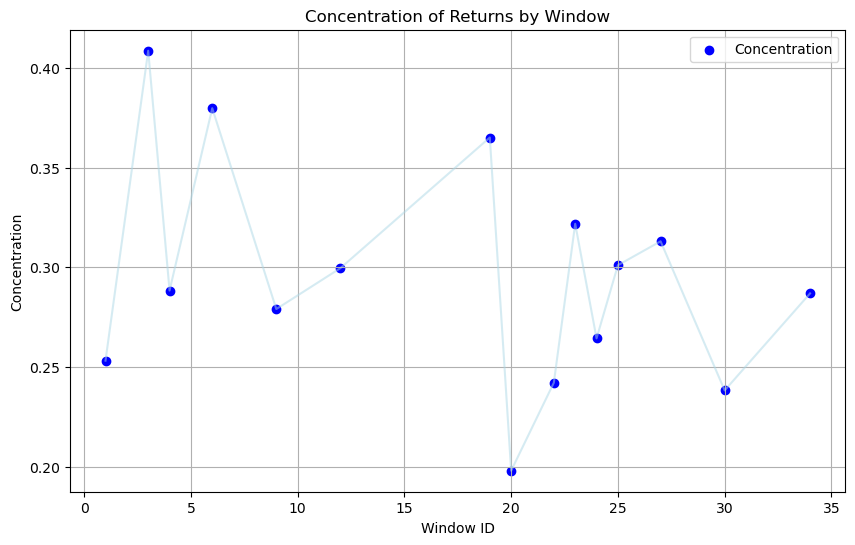

In [4]:
plt.figure(figsize=(10, 6))
# Use the DataFrame's index for the x-axis if 'window_idx' is the index
plt.scatter(df_concentration_pos.index, df_concentration_pos['Concentration'], color='blue', label='Concentration')
plt.plot(df_concentration_pos.index, df_concentration_pos['Concentration'], color='lightblue', alpha=0.5)  # Connect dots with a line

plt.xlabel('Window ID')
plt.ylabel('Concentration')
plt.title('Concentration of Returns by Window')
plt.grid(True)
plt.legend()

plt.show()


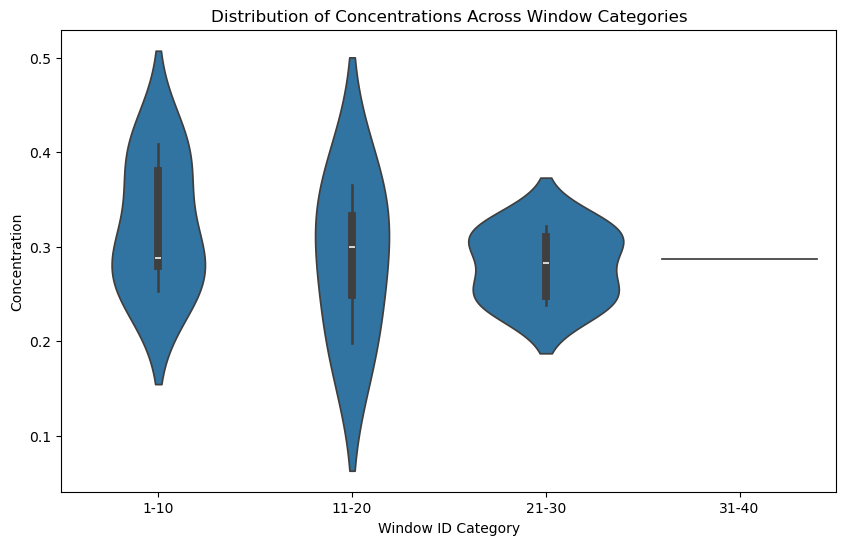

In [6]:

df_reset = df_concentration_pos.reset_index()

df_reset['Category'] = pd.cut(df_reset['window_idx'], bins=[0, 10, 20, 30, 40], labels=['1-10', '11-20', '21-30', '31-40'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Concentration', data=df_reset)

plt.xlabel('Window ID Category')
plt.ylabel('Concentration')
plt.title('Distribution of Concentrations Across Window Categories')
plt.show()



A detailed examination of the data reveals a diverse range of concentration levels, indicating that the contribution of top-performing strategies to the overall positive return varies substantially across different periods. Concentration levels span from a low of 19.8% to a high of 40.9%, highlighting the fluctuating influence of leading strategies on the portfolio's success.

This variance in concentration levels suggests that the portfolio's positive returns are not consistently driven by the same strategies. In certain periods, a more significant portion of positive returns is attributed to the top strategies, indicating a high concentration of performance. In contrast, other periods show a more distributed contribution across strategies, leading to lower concentration levels. Such diversity in concentration indicates a dynamic interplay of strategies, where different strategies emerge as top contributors in various periods, reflecting the adaptive nature of the portfolio management and strategy selection process.

Moreover, the concentration return's distribution underscores the importance of diversification within the portfolio. Periods with lower concentration levels imply that positive returns are more evenly spread among various strategies, potentially mitigating risk by not relying heavily on a few strategies. On the other hand, periods of high concentration highlight the outsized impact certain strategies can have on portfolio performance, underscoring the need for vigilant portfolio review and strategy evaluation to capitalize on these opportunities while managing associated risks.

## 3. Analysis of Positive Return Windows Followed by Negative Return Windows

In this section, we will focus on the occurrence of positive return windows and their subsequent impact on portfolio performance. More precisely we will observe the phenomenon where periods of positive returns are followed by periods of negative returns. It provides insights into the volatility and risk profile of the portfolio, informs risk management practices, and helps in evaluating the consistency of strategy performance. The analysis, underpinned by the df_posi dataset, catalogs the return and concentration metrics for periods immediately following those of positive returns.

In [7]:
df_posi = portofolio.following_positive_df

In [8]:
df_posi

,Start Date,End Date,Strat Return,Capital,Concentration
0,2017-05-05,2017-06-05,-0.019240,2.500000e+08,0.454723
1,2017-07-06,2017-08-03,0.039401,2.500000e+08,0.288362
2,2017-08-04,2017-09-01,-0.007263,2.500000e+08,0.308416
3,2017-10-04,2017-11-01,-0.000274,2.743553e+08,0.456093
4,2018-01-04,2018-02-02,-0.052342,3.000000e+08,0.317374
5,2018-04-06,2018-05-04,-0.008630,3.000000e+08,0.308132
6,2018-11-01,2018-11-29,0.029976,3.000000e+08,0.198034
7,2018-11-30,2018-12-28,-0.052802,2.808413e+08,0.301115
8,2019-01-30,2019-02-27,0.012572,2.521472e+08,0.321815
9,2019-02-28,2019-03-28,0.040202,3.000000e+08,0.264375


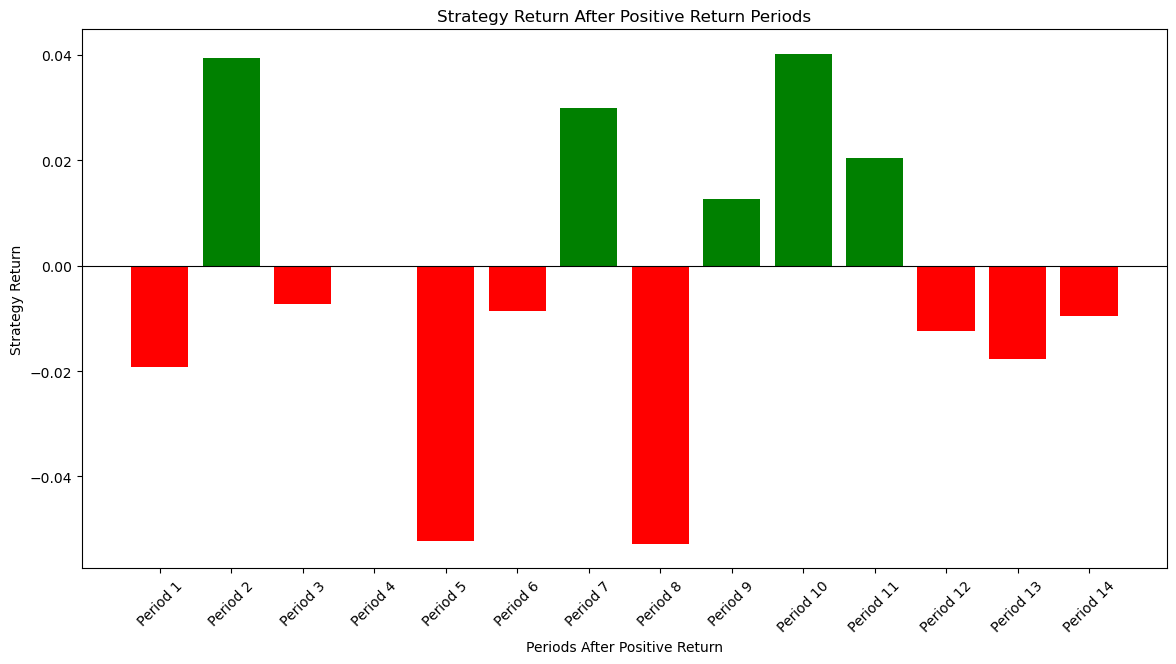

In [9]:

colors = ['green' if x > 0 else 'red' for x in df_posi['Strat Return']]

plt.figure(figsize=(14, 7))
bars = plt.bar(df_posi.index, df_posi['Strat Return'], color=colors)

# Adding labels and title
plt.xlabel('Periods After Positive Return')
plt.ylabel('Strategy Return')
plt.title('Strategy Return After Positive Return Periods')

# Customizing the x-ticks to show readable labels
# Since df_posi.index might not be consecutive integers, we'll enumerate over it for labels
plt.xticks(df_posi.index, labels=[f"Period {i+1}" for i, _ in enumerate(df_posi.index)], rotation=45)

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.8)

plt.show()


## Conclusion

A cursory examination of the data reveals a mixture of positive and negative returns following periods of positive performance, suggesting that the hypothesized pattern of positive returns invariably leading to negative ones does not hold uniformly across the dataset. Notably, there are instances where periods of positive returns are succeeded by additional positive returns, and these occurrences are interspersed with periods of negative returns as well.

It is observed that both high and moderate concentrations of returns do not consistently predict the sign of subsequent returns, pointing towards the multifaceted nature of strategy performance and its dependency on external conditions and internal portfolio configuration.

In conclusion, the evidence gathered from the df_posi analysis suggests that the portfolio's performance dynamics are intricate, with no straightforward pattern of positive returns being systematically followed by negative ones. This finding emphasizes the importance of a diversified strategy and the need for continuous assessment and adaptation of portfolio configurations to navigate the ever-evolving market landscapes. 